In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
market_caps = pd.read_csv("data/new/market_caps.csv")
prices = pd.read_csv("data/new/prices.csv")
volumes = pd.read_csv("data/new/volumes.csv")

In [80]:
def period_rebalance(coins, prices, mcs, period=42, allocations="equal", starting=1000000):
    n = len(coins)
    if allocations=='equal':
        weights = dict(zip(coins, n*[1./n]))
        
    dates = prices['date'].to_numpy()
    days = len(dates)
    
    rebalance_df = pd.DataFrame({'date':dates})
    rebalance_df['portfolio_value'] = pd.Series(dtype='float64')
    for coin in coins:
        rebalance_df[coin+'_percent'] = pd.Series(dtype='float64')
        rebalance_df[coin+'_value'] = pd.Series(dtype='float64')
        rebalance_df[coin+'_amount'] = pd.Series(dtype='float64')
        
    rebalance_df.at[0, 'portfolio_value'] = starting
    for coin in coins:
        rebalance_df.at[0, coin+'_percent'] = 100*weights[coin]
        rebalance_df.at[0, coin+'_value'] = starting*weights[coin]
        rebalance_df.at[0, coin+'_amount'] = starting*weights[coin]/prices.loc[0,coin+'_price']
        
    for i in range(1,days):
        new_total = 0
        for coin in coins:
            coin_amount = rebalance_df.loc[i-1, coin+'_amount']
            new_price = prices.loc[i, coin+'_price']
            new_value = new_price*coin_amount
            rebalance_df.at[i, coin+'_value'] = new_value
            rebalance_df.at[i, coin+'_amount'] = coin_amount
            new_total += new_value
            
        rebalance_df.at[i, 'portfolio_value'] = new_total
        for coin in coins:
            new_coin_percent = rebalance_df.loc[i, coin+'_value']/new_total * 100
            rebalance_df.at[i, coin+'_percent'] = new_coin_percent
            
        
        if i%period == 0:
            for coin in coins:
                new_value = weights[coin]*rebalance_df.loc[i, 'portfolio_value']
                new_amount = new_value/prices.loc[i, coin+'_price']
                new_percent = 100*weights[coin]
                
                rebalance_df.at[i, coin+'_percent'] = new_percent
                rebalance_df.at[i, coin+'_value'] = new_value
                rebalance_df.at[i, coin+'_amount'] = new_amount
        
        
    return rebalance_df

In [118]:
df = period_rebalance(['bitcoin', 'ethereum', 'ripple', 'litecoin'],prices,market_caps,period=1)

In [119]:
df

,date,portfolio_value,bitcoin_percent,bitcoin_value,bitcoin_amount,ethereum_percent,ethereum_value,ethereum_amount,ripple_percent,ripple_value,ripple_amount,litecoin_percent,litecoin_value,litecoin_amount
0,2018-01-01,1.000000e+06,25.0,250000.000000,17.738539,25.0,250000.000000,322.131602,25.0,250000.000000,108219.486434,25.0,250000.000000,1084.776968
1,2018-01-02,1.096643e+06,25.0,274160.848217,17.893359,25.0,274160.848217,312.651264,25.0,274160.848217,111661.289794,25.0,274160.848217,1074.937460
2,2018-01-03,1.195599e+06,25.0,298899.828919,19.180058,25.0,298899.828919,310.366070,25.0,298899.828919,95626.218977,25.0,298899.828919,1205.036226
3,2018-01-04,1.213050e+06,25.0,303262.566874,18.981950,25.0,303262.566874,309.952550,25.0,303262.566874,94179.458976,25.0,303262.566874,1238.643757
4,2018-01-05,1.250403e+06,25.0,312600.799127,17.047615,25.0,312600.799127,311.078081,25.0,312600.799127,106639.466438,25.0,312600.799127,1230.040975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,2023-01-11,9.730157e+05,25.0,243253.914962,13.950523,25.0,243253.914962,182.073957,25.0,243253.914962,691799.071763,25.0,243253.914962,3009.754635
1837,2023-01-12,1.017681e+06,25.0,254420.348887,14.136951,25.0,254420.348887,183.066295,25.0,254420.348887,678150.376658,25.0,254420.348887,3014.331658
1838,2023-01-13,1.039987e+06,25.0,259996.858289,13.780647,25.0,259996.858289,183.466554,25.0,259996.858289,692018.869057,25.0,259996.858289,3025.323055
1839,2023-01-14,1.070558e+06,25.0,267639.486046,13.421043,25.0,267639.486046,184.150088,25.0,267639.486046,692137.489320,25.0,267639.486046,3096.261122


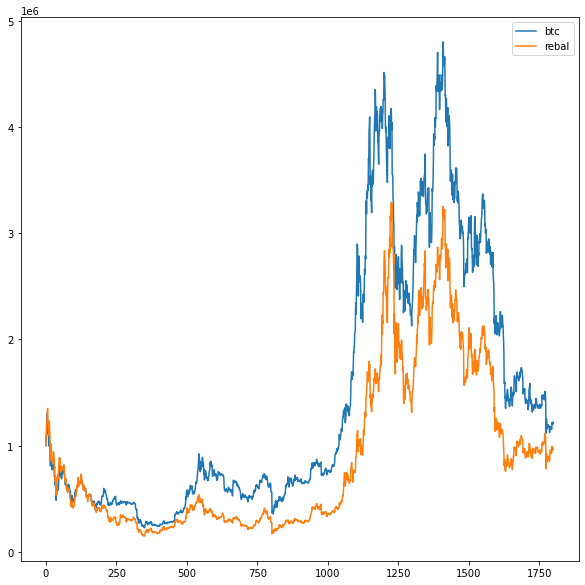

In [120]:
fig = plt.figure(figsize=(10,10))
a=1800
plt.plot(prices['bitcoin_price'][:a]*71, label='btc')
plt.plot(df['portfolio_value'][:a], label='rebal')
plt.legend()

In [111]:
prices.columns.values

array(['date', 'bitcoin_price', 'ethereum_price', 'tether_price',
       'usd-coin_price', 'binancecoin_price', 'ripple_price',
       'binance-usd_price', 'cardano_price', 'dogecoin_price',
       'matic-network_price', 'solana_price', 'okb_price',
       'staked-ether_price', 'polkadot_price', 'shiba-inu_price',
       'litecoin_price', 'tron_price', 'dai_price', 'avalanche-2_price',
       'uniswap_price', 'wrapped-bitcoin_price', 'cosmos_price',
       'the-open-network_price', 'leo-token_price', 'chainlink_price',
       'monero_price', 'ethereum-classic_price', 'bitcoin-cash_price',
       'stellar_price', 'quant-network_price', 'crypto-com-chain_price',
       'near_price', 'apecoin_price', 'lido-dao_price', 'filecoin_price',
       'algorand_price', 'vechain_price', 'internet-computer_price',
       'hedera-hashgraph_price', 'aptos_price', 'decentraland_price',
       'aave_price', 'the-sandbox_price', 'eos_price', 'flow_price',
       'frax_price', 'terra-luna_price', 'elrond-